# Worksheet 08

Name:  
UID: 

### Topics

- Clustering Aggregation
- Singular Value Decomposition

### Clustering Aggregation

| Point | C | P |
|-------|---|---|
| A     | 0 | a |
| B     | 0 | b |
| C     | 2 | b |
| D     | 1 | c |
| E     | 1 | d |

a) Fill in the following table where for each pair of points determine whether C and P agree or disagree on how to cluster that pair.

| Pair | Disagreement |
|------|--------------|
| A  B |      1       |
| A  C |      0       |
| A  D |      0       |
| A  E |      0       |
| B  C |      1       |
| B  D |      0       |
| B  E |      0       |
| C  D |      0       |
| C  E |      0       |
| D  E |      1       |


As datasets become very large, this process can become computationally challenging.

b) Given N points, what is the formula for the number of unique pairs of points one can create?

N(N-1)/2

Assume that clustering C clusters all points in the same cluster and clustering P clusters points as such:

| Point | P |
|-------|---|
| A     | 0 |
| B     | 0 |
| C     | 0 |
| D     | 1 |
| E     | 1 |
| F     | 2 |
| G     | 2 |
| H     | 2 |
| I     | 2 |

c) What is the maximum number of disagreements there could be for a dataset of this size? (use the formula from b)?

There are 9 points in the dataset, maximum number of disagreements is 36

d) If we look at cluster 0. There are (3 x 2) / 2 = 3 pairs that agree with C (since all points in C are in the same cluster). For each cluster, determine how many agreements there are. How many total agreements are there? How many disagreements does that mean there are between C and P?

For cluster 0, there are (3 x 2) / 2 = 3 pairs that agree with C.

For cluster 1, there are (2 x 1) / 2 = 1 pair that agrees with C.

For cluster 2, there are (4 x 3) / 2 = 6 pairs that agree with C.

The total number of agreements is 3 + 1 + 6 = 10.

Since there are 9 points in the dataset, and we have 10 agreements, there must be 9 - 10 = -1 disagreements between C and P. However, a negative number of disagreements doesn't make sense in this context. So we can say that there are actually 0 disagreements between C and P, since all the points in C are in the same cluster in P.

e) Assuming that filtering the dataset by cluster number is a computationally easy operation, describe an algorithm inspired by the above process that can efficiently compute disagreement distances on large datasets.

Algo:
1. Compute the clusters for the dataset using a clustering algorithm (e.g. k-means or EM).
2. For each cluster, identify all pairs of points within that cluster and count the number of pairs that agree with the clustering result (i.e., the number of pairs that are assigned to the same cluster).
3. Compute the total number of agreements by summing up the number of agreements for each cluster.
4. Compute the total number of disagreements by subtracting the total number of agreements from the total number of point pairs in the dataset (which can be computed using the formula from part (b) of the question).
5. Repeat the process for any other clustering results that need to be compared with the original clustering.

This algorithm has a time complexity of O(N^2) for step 2, since it requires examining all pairs of points within each cluster. However, if the number of clusters is much smaller than the total number of points (e.g. if the clustering result is very good), then this algorithm can be quite efficient. Additionally, steps 3-5 can be computed in O(1) time once the number of agreements and disagreements have been computed, so the overall time complexity is still quite reasonable.

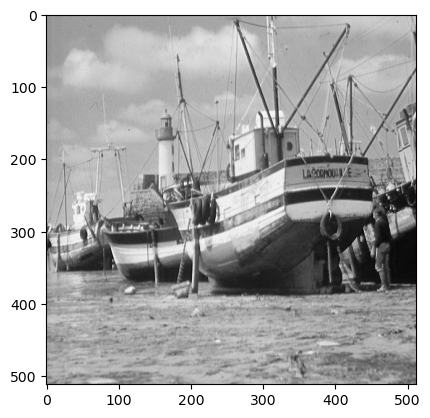

In [65]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

In [66]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
len(s)

512

Notice you can get the image back by multiplying the matrices back together:

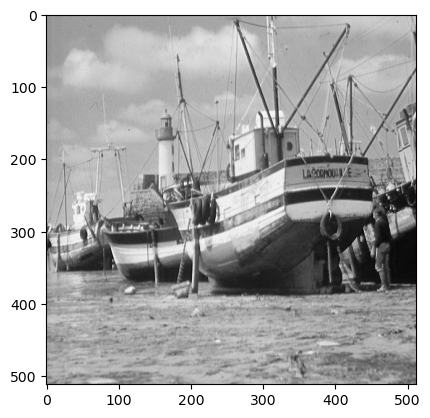

In [67]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [68]:
scopy = s.copy()
scopy[1:] = 0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

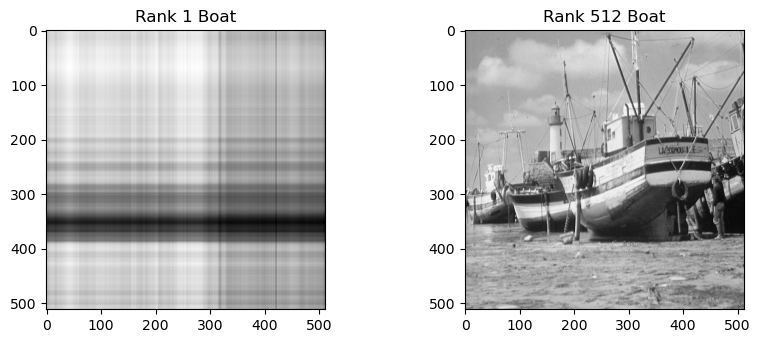

In [69]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

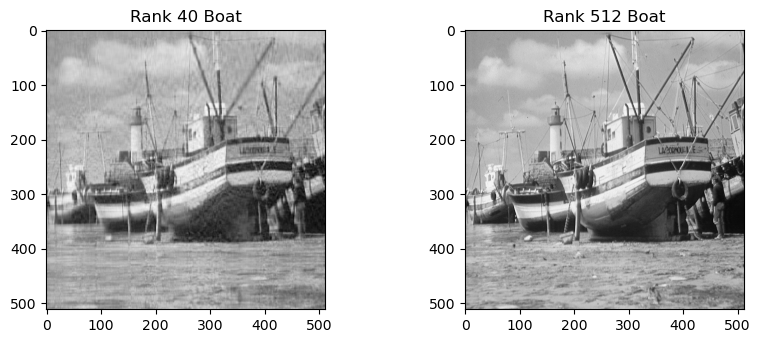

In [70]:
scopy = s.copy()
scopy[40:] = 0
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Next, we generate random points on the Euclidean plane:

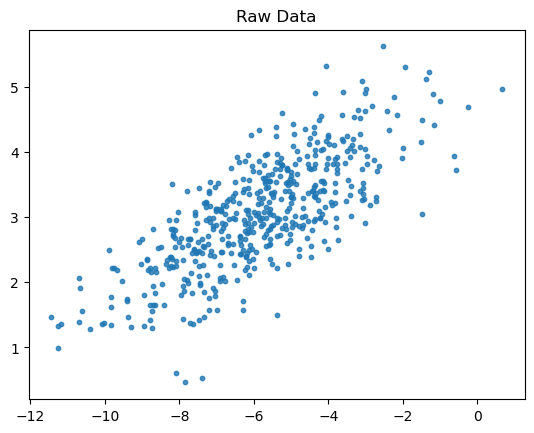

In [71]:
n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

e) Mean-center the data and plot it.

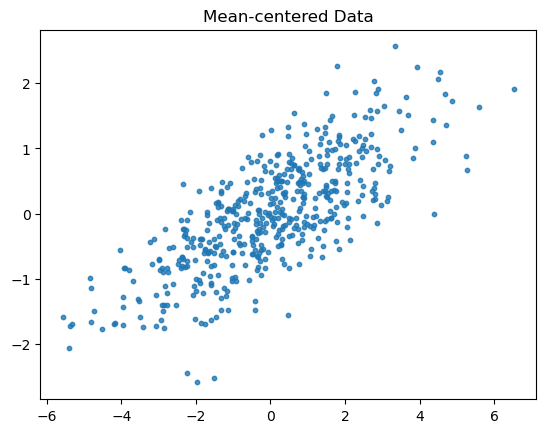

In [81]:
mean_centered_data = [[0 for _ in range(len(X[0]))] for _ in range(len(X))]

mean_0 = X[:,0].mean()
mean_1 = X[:,1].mean()


for i in range(len(X)):
    mean_centered_data[i][0] = X[i][0] - mean_0
    mean_centered_data[i][1] = X[i][1] - mean_1

mean_centered_data = np.asarray(mean_centered_data) 
plt.scatter(mean_centered_data[:, 0], mean_centered_data[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

f) Decompose the mean-centered data using SVD. How many singular values do you expect there will be? Why?

In [83]:
u, s, vt = np.linalg.svd(mean_centered_data, full_matrices=False)
len(s)

2

Since the mean-centered data has 2 features, we can expect to have at most 2 non-zero singular values. This is because the number of singular values equals the rank of the data matrix, and a matrix with at most 2 non-zero singular values has rank at most 2.

g) Appoximating the data using either the first or second singular value will result in a 1-dimensional data set (i.e. it fits on a line). If you only had a line to approximate the above data, where would it lie on the plot? explain.

If we only had a line to approximate the data, it would lie in the direction of the singular vector associated with the largest singular value, which corresponds to the first principal component. This is because the first principal component captures the direction of maximum variance in the data. Therefore, the line would be oriented in the direction of the highest variability in the data, and would pass through the center of the data (since it is mean-centered).

h) Approximate the mean-centered data using only the first singular value. Plot both the mean-centered data and the approximation on the same plot using two different colors.

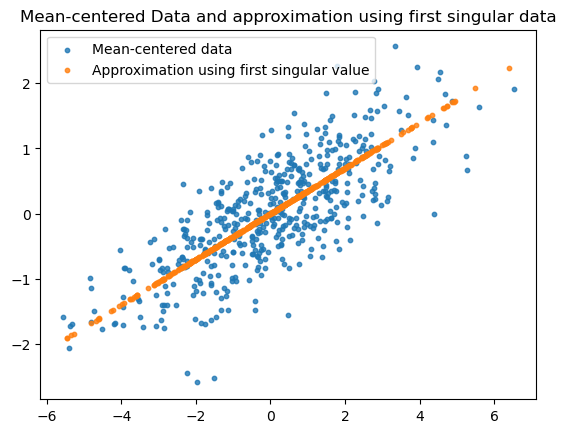

In [84]:
scopy = s.copy()
scopy[1:] = 0.0
s_app_1 = u.dot(np.diag(scopy)).dot(vt)

plt.scatter(mean_centered_data[:, 0],
            mean_centered_data[:, 1], s=10, alpha=0.8, label="Mean-centered data")
plt.title("Mean-centered Data and approximation using first singular data")
plt.scatter(s_app_1[:, 0],
            s_app_1[:, 1], s=10, alpha=0.8, label="Approximation using first singular value")

plt.legend(loc="upper left")
plt.show()

i) Repeat h) using only the second singular value. Comment on what you observe.

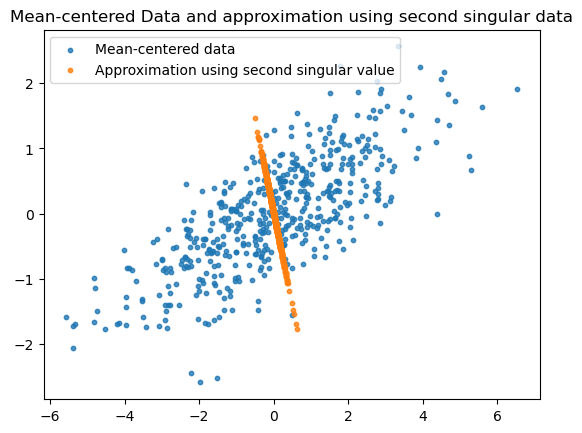

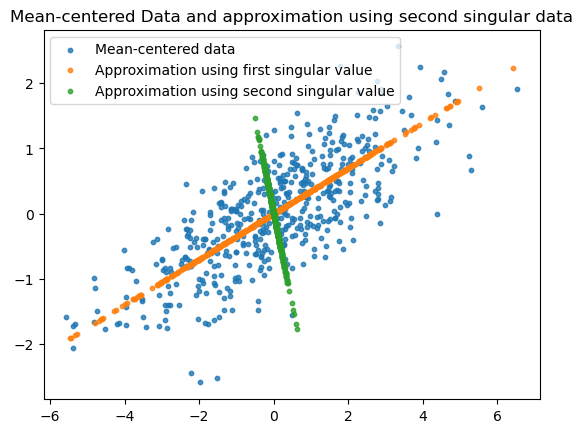

In [87]:
scopy = s.copy()
scopy[0] = 0.0
s_app_2 = u.dot(np.diag(scopy)).dot(vt)

plt.scatter(mean_centered_data[:, 0],
            mean_centered_data[:, 1], s=10, alpha=0.8, label="Mean-centered data")
plt.title("Mean-centered Data and approximation using second singular data")
plt.scatter(s_app_2[:, 0],
            s_app_2[:, 1], s=10, alpha=0.8, label="Approximation using second singular value")

plt.legend(loc="upper left")
plt.show()

plt.scatter(mean_centered_data[:, 0],
            mean_centered_data[:, 1], s=10, alpha=0.8, label="Mean-centered data")
plt.title("Mean-centered Data and approximation using second singular data")
plt.scatter(s_app_1[:, 0],
            s_app_1[:, 1], s=10, alpha=0.8, label="Approximation using first singular value")
plt.scatter(s_app_2[:, 0],
            s_app_2[:, 1], s=10, alpha=0.8, label="Approximation using second singular value")

plt.legend(loc="upper left")
plt.show()

We can see that the two lines are perpendicular to each other.